# Treść zadania

## Zadanie 1

Rozważmy zbiór zmiennych ("bazę danych") $\{x, y, z\}$
i następujący zbiór akcji ("transakcji") modyfikujących wartości tych zmiennych:

- **(a)** $x ← x + y$
- **(b)** $y ← y + 2z$
- **(c)** $x ← 3x + z$
- **(d)** $z ← y - z$

Akcje możemy wykonywać współbieżnie z następującym zastrzeżeniem: akcja zmieniająca wartość zmiennej nie może być wykonana
współbieżnie z akcją odczytującą lub modyfikującą stan tej samej zmiennej. W języku teorii śladów: dwie akcje są zależne jeśli
obie operują na tej samej zmiennej, a przynajmniej jedna z nich modyfikuje wartość tej zmiennej.

### Zadanie 1a

W alfabecie $A = \{a, b, c, d\}$ określ relacje zależności i niezależności.

### Zadanie 1b

Wyznacz ślad wyznaczony przez słowo $w = baadcb$ względem powyższej relacji niezależności.

### Zadanie 1c

Wyznacz postać normalną Foaty śladu $[w]$. Można skorzystać z algorytmu z pracy Volker Diekert, Yves Métivier :
Partial Commutation and Traces str 11

### Zadanie 1d

Narysuj graf zależności Diekerta (w postaci zminimalizowanej - bez krawędzi "przechodnich") dla słowa $w$.

## Zadanie 2

Dany jest zbiór akcji:

- **(a)** $x ← y + z$
- **(b)** $y ← x + w + y$
- **(c)** $x ← x + y + v$
- **(d)** $w ← v + z$
- **(e)** $v ← x + v + w$
- **(f)** $z ← y + z + v$

### Zadanie 2a

W alfabecie $A = \{a, b, c, d, e, f\}$ określ relacje zależności i niezależności.

### Zadanie 2b

Wyznacz postać normalną Foaty śladu $[u]$, $u = acdcfbbe$

### Zadanie 2c

Narysuj graf zależności Diekerta (w postaci zminimalizowanej - bez krawędzi "przechodnich") dla słowa $u$. 

# Wstęp

## Algorytm do tworzenia stosów

- Zaczynamy od pustych stosów dla każdej litery z $\Sigma$.
- Skanujemy słowo $x$ od prawej do lewej strony.
- Gdy napotkamy literę $a$, wykonujemy następujące kroki:

  - Wkładamy literę $a$ na stos $S_a$​.
  - Dla każdej litery $b$ ($b \ne a$), która nie komutuje z $a$ (tzn. $(a, b) \in D$ lub $(b, a) \in D$),
    wkładamy znacznik na stos $S_b$​.

> Let $M(\Sigma; I)$ be a free partially commutative monoid, we use a stack for each
> letter of the alphabet $\Sigma$. Let $x$ be a word of $\Sigma^*$; we scan $x$ from right to left;
> when processing a letter $a$ it is pushed on its stack and a marker is pushed
> on the stack of all the letters $b$ ($b \ne a$) which do not commute with $a$.

## Algorytm do wyznaczania leksykograficznej postaci normalnej (LNF)

- **Tworzenie stosów:** Na początku tworzymy stos dla każdej litery w słowie. Dodajemy litery do odpowiednich stosów w
  kolejności od prawej do lewej strony słowa.

- **Wybór minimalnej litery:** Spośród liter znajdujących się na wierzchu stosów wybieramy tę, która jest najmniejsza według
  ustalonego porządku leksykograficznego.

- **Usuwanie znaczników:** Usuwamy znacznik ze stosu każdej litery, która nie komutuje z wybraną literą.

- **Powtarzanie procesu:** Powtarzamy kroki 2 i 3, aż wszystkie stosy będą puste.

> To get the lexicographic normal form: it suffices to take among the letters being on the top of some stack that letter
> $a$ being minimal with respect to the given lexicographic ordering. We pop a marker on each stack corresponding to a letter
> $b$ ($b \ne a$) which does not commute with $a$. We repeat this loop until all stacks are empty.

## Algorytm do wyznaczania postaci normalnej Foaty (FNF)

- **Pobieranie liter z wierzchu stosów:** Patrzymy na litery, które są na górze każdego stosu. Wszystkie te litery zbieramy do
  jednego zbioru.

- **Uporządkowywanie liter:** Teraz bierzemy te litery i układamy je w kolejności alfabetycznej. Ten uporządkowany zbiór liter
  to nasz "krok" w postaci normalnej Foaty.

- **Usuwanie znaczników:** Usuwamy znaczniki ze stosu tych liter, które nie komutują z wybranymi literami.

- **Powtarzamy proces:** Kontynuujemy ten proces, powtarzając te kroki, aż wszystkie stosy będą puste.

> To get the Foata normal form we take within a loop the set formed by letters being on the top of stacks; arranging the letters
> in the lexicographic order yields a step. As previously we pop the corresponding markers. Again this loop is repeated until all
> stacks are empty.

## Graf zależności Diekerta

**Graf zależności Diekerta** to graf skierowany, który przedstawia relacje zależności między literami danego słowa.
Graf ten ma następujące własności:

- **Wierzchołki grafu odpowiadają literom słowa**, a **krawędzie odpowiadają parom liter, które są zależne**, czyli nie można
  ich zamienić miejscami bez zmiany znaczenia słowa.

- **Graf jest zminimalizowany**, jeśli nie zawiera krawędzi "przechodnich", czyli takich, które można usunąć bez zmiany struktury
  grafu. Krawędź jest "przechodnia", jeśli istnieje inna ścieżka między jej końcami.

- **Graf jest acykliczny**, jeśli nie zawiera cykli, czyli zamkniętych ścieżek. Graf jest cykliczny, jeśli zawiera co najmniej
  jeden cykl.

- **Graf jest spójny**, jeśli istnieje ścieżka między dowolnymi dwoma wierzchołkami. Graf jest niespójny, jeśli można go
  podzielić na dwie lub więcej części, które nie są połączone krawędziami.

Graf zależności Diekerta służy do badania własności słów i śladów, takich jak cykliczność, spójność, kolorowalność, czy istnienie
cyklu lub ścieżki Eulera lub Hamiltona. Graf ten jest również używany do konstruowania postaci normalnych słów i śladów.

### Algorytm tworzenia grafu zależności Diekerta

- Dla każdej litery $x_i \in w$ stwórz wierzchołek $v_i$
- $\forall j \in [1, n] \forall i \in [j - 1, 0]$ dodaj krawędź skierowaną łączącą $v_i$ oraz $v_j$ ($v_i \rightarrow v_j$)
  jeżeli $(i, j) \in D$ oraz nie istnieje innej ścieżki od $v_i$ do $v_j$

gdzie $w$ - dane słowo, $D$ - relacja zależności.

# Rozwiązanie

**Uwaga**: cześć rozwiązań laboratorium 10 (grafy, zadanie 2) powstała w oparciu o algorytmy zaimplementowane w ramach
laboratorium 11.

## Zadanie 1a

- Akcje $a$ i $b$ **są zależne**, ponieważ akcja $a$ odczytuje wartość zmiennej $y$, a akcja $b$ z kolei modyfikuje wartość
  tej zmiennej

- Akcje $a$ i $c$ **są zależne**, ponieważ obie operują na zmiennej $x$ (odczytują oraz modyfikują)

- Akcje $b$ i $d$ **są zależne**, ponieważ akcja $b$ modyfikuje wartość zmiennej $y$ i odczytuje $z$, z kolei akcja $d$
  modyfikuje wartość zmiennej $z$ i oczytuje $y$

- Akcje $c$ i $d$ **są zależne**, ponieważ akcja $c$ odczytuje wartość zmiennej $z$, a akcja $d$ modufikuje tę zmienną

Pozostałe pary są niezależne.

- $I = \{(a, d), (d, a), (b, c), (c, b)\}$
- $D = \bar{I}$

## Zadanie 1b

$w = baadcb$

| a | b | c | d |
|---|---|---|---|
| * | b | c | * |
| * | * | * | * |
| a | * | * | d |
| a | * | * | * |
| * | b |   |   |

1. `pop(b)` → **b**
2. `pop(a)` → *
3. `pop(d)` → *

| a | b | c | d |
|---|---|---|---|
| * | b | c | * |
| * | * | * | * |
| a | * | * | d |
| a | * | * |   |

1. `pop(a)` → **a**
2. `pop(b)` → *
3. `pop(c)` → *

| a | b | c | d |
|---|---|---|---|
| * | b | c | * |
| * | * | * | * |
| a | * | * | d |

1. `pop(a)` → **a**
2. `pop(b)` → *
3. `pop(c)` → *

| a | b | c | d |
|---|---|---|---|
| * | b | c | * |
| * | * | * | * |
|   |   |   | d |

1. `pop(d)` → **d**
2. `pop(b)` → *
3. `pop(c)` → *

| a | b | c | d |
|---|---|---|---|
| * | b | c | * |
| * |   |   | * |

1. `pop(b)` → **b**
2. `pop(a)` → *
3. `pop(d)` → *

| a | b | c | d |
|---|---|---|---|
| * |   | c | * |

1. `pop(c)` → **c**
2. `pop(a)` → *
3. `pop(d)` → *

= $baadbc$

## Zadanie 1c

$w = baadcb$

| a | b | c | d |
|---|---|---|---|
| * | b | c | * |
| * | * | * | * |
| a | * | * | d |
| a | * | * | * |
| * | b |   |   |

1. `pop(b)` → **b**
2. `pop(a)` → *
3. `pop(d)` → *

| a | b | c | d |
|---|---|---|---|
| * | b | c | * |
| * | * | * | * |
| a | * | * | d |
| a | * | * |   |

1. `pop(a)` → **a**
2. `pop(b)` → *
3. `pop(c)` → *
4. `pop(d)` → **d**
5. `pop(b)` → *
6. `pop(c)` → *

| a | b | c | d |
|---|---|---|---|
| * | b | c | * |
| * | * | * | * |
| a |   |   |   |

1. `pop(a)` → **a**
2. `pop(b)` → *
3. `pop(c)` → *

| a | b | c | d |
|---|---|---|---|
| * | b | c | * |
| * |   |   | * |

1. `pop(b)` → **b**
2. `pop(a)` → *
3. `pop(d)` → *
4. `pop(c)` → **c**
5. `pop(a)` → *
6. `pop(d)` → *

= $(b)(ad)(a)(bc)$

## Zadanie 1d

Korzystając z algorytmów, zaimplementowanych podczas wykonania laboratorium 11, został wygenerowany następujący graf:

```
digraph g {
	1 -> 2
	1 -> 3
	2 -> 4
	3 -> 5
	3 -> 6
	4 -> 5
	4 -> 6
	1[label=b]
	2[label=a]
	3[label=d]
	4[label=a]
	5[label=c]
	6[label=b]
}
```

który wygląda w sposób następujący:

<!-- 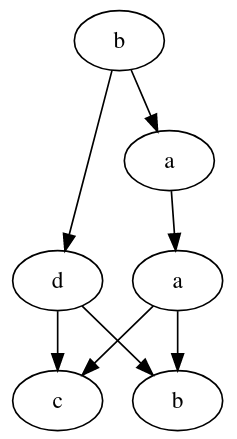 -->
$$\includegraphics[width=3.5cm]{attachment:Screenshot_20231217_011732.png}$$

## Zadanie 2a

- $I = \{(a, d), (d, a), (b, e), (e, b), (c, d), (d, c), (c, f), (f, c)\}$
- $D = \bar{I}$

Gdzie $I$ - zbiór niezaleznych akcji, $D$ - zbiór zależnych akcji.

## Zadanie 2b

### FNF

```
   a  b  c  d  e  f
0  *  b  *  *  e  *
1  *  b  *  *  *  *
2  *  *  *  *  *  *
3  *  *  c  *  *  f
4  *  *  c  d  *  *
5  *  *  *     *  *
6  a  *            
```

- Popped top: `['a', 'd']`
- Removed markers: `['b', 'b', 'c', 'e', 'e', 'f', 'f']`

```
   a  b  c  d  e  f
0  *  b  *  *  e  *
1  *  b  *  *  *  *
2  *  *  *  *  *  *
3  *  *  c  *  *  f
4  *  *  c         
5  *               
```

- Popped top: `['c', 'f']`
- Removed markers: `['a', 'a', 'b', 'b', 'd', 'e', 'e']`

```
   a  b  c  d  e  f
0  *  b  *  *  e  *
1  *  b  *  *  *  *
2  *  *  *  *     *
3  *     c         
```

- Popped top: `['c']`
- Removed markers: `['a', 'b', 'e']`

```
   a  b  c  d  e  f
0  *  b  *  *  e  *
1  *  b  *  *     *
2  *     *  *     *
```

- Popped top: `['b', 'e']`
- Removed markers: `['a', 'a', 'c', 'c', 'd', 'd', 'f', 'f']`

```
   a  b  c  d  e  f
0  *  b  *  *     *
```

- Popped top: `['b']`
- Removed markers: `['a', 'c', 'd', 'f']`

$FNF = (ad)(cf)(c)(be)(b)$

## LNF

```
   a  b  c  d  e  f
0  *  b  *  *  e  *
1  *  b  *  *  *  *
2  *  *  *  *  *  *
3  *  *  c  *  *  f
4  *  *  c  d  *  *
5  *  *  *     *  *
6  a  *            
```

- Popped action: `a`
- Removed markers: `['b', 'c', 'e', 'f']`

```
   a  b  c  d  e  f
0  *  b  *  *  e  *
1  *  b  *  *  *  *
2  *  *  *  *  *  *
3  *  *  c  *  *  f
4  *  *  c  d  *  *
5  *  *            
```

- Popped action: `c`
- Removed markers: `['a', 'b', 'e']`

```
   a  b  c  d  e  f
0  *  b  *  *  e  *
1  *  b  *  *  *  *
2  *  *  *  *  *  *
3  *  *  c  *  *  f
4  *  *     d     *
```

- Popped action: `c`
- Removed markers: `['a', 'b', 'e']`

```
   a  b  c  d  e  f
0  *  b  *  *  e  *
1  *  b  *  *  *  *
2  *  *  *  *  *  *
3  *  *     *     f
4           d     *
```

- Popped action: `d`
- Removed markers: `['b', 'e', 'f']`

```
   a  b  c  d  e  f
0  *  b  *  *  e  *
1  *  b  *  *  *  *
2  *  *  *  *     *
3  *        *     f
```

- Popped action: `f`
- Removed markers: `['a', 'b', 'd', 'e']`

```
   a  b  c  d  e  f
0  *  b  *  *  e  *
1  *  b  *  *     *
2  *     *  *     *
```

- Popped action: `b`
- Removed markers: `['a', 'c', 'd', 'f']`

```
   a  b  c  d  e  f
0  *  b  *  *  e  *
1  *     *  *     *
```

- Popped action: `b`
- Removed markers: `['a', 'c', 'd', 'f']`

```
   a  b  c  d  e  f
0  *     *  *  e  *
```

- Popped action: `e`
- Removed markers: `['a', 'c', 'd', 'f']`

$LNF = accdfbbe$

## Zadanie 2c

Korzystając z algorytmów, zaimplementowanych podczas wykonania laboratorium 11, został wygenerowany następujący graf:

```
digraph g {
	1 -> 2
	1 -> 5
	2 -> 4
	3 -> 5
	4 -> 6
	4 -> 8
	5 -> 6
	5 -> 8
	6 -> 7
	1[label=a]
	2[label=c]
	3[label=d]
	4[label=c]
	5[label=f]
	6[label=b]
	7[label=b]
	8[label=e]
}
```

który wygląda w sposób następujący:

<!-- 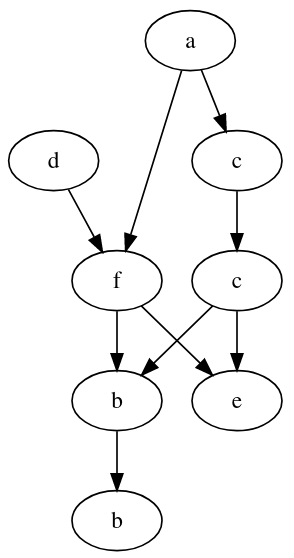 -->
$$\includegraphics[width=4.5cm]{attachment:Screenshot_20231217_011857.png}$$

# Wnioski

- **Algorytm LNF** pozwala na wyznaczenie leksykograficznej postaci normalnej dowolnego słowa nad danym alfabetem względem
  danej relacji niezależności.

- **Algorytm LNF** opiera się na zasadzie wyboru najmniejszej litery spośród dostępnych na stosach i usuwaniu znaczników z
  liter, które z nią nie komutują.

- **Algorytm FNF** pozwala na wyznaczenie postaci normalnej Foaty dowolnego słowa nad danym alfabetem względem danej relacji
  niezależności.

- **Algorytm FNF** opiera się na zasadzie tworzenia zbiorów liter z wierzchu stosów i uporządkowywania ich w kolejności
  alfabetycznej.

- **Relacja niezależności** $I$ jest relacją dwuargumentową, która określa, które litery w danym alfabecie mogą być zamienione
  miejscami bez zmiany znaczenia słowa.

- **Relacja zależności** $D$ to zbiór par liter, które nie można zamienić miejscami bez zmiany znaczenia słowa.

- **Ślad** $[w]$ słowa $w$ nad danym alfabetem względem danej relacji niezależności to zbiór wszystkich słów, które można
  otrzymać z $w$ przez zamianę liter niezależnych.

- **Graf zależności Diekerta** dla słowa $w$ to graf skierowany, w którym wierzchołki odpowiadają literom słowa ww, a krawędzie
  odpowiadają relacji zależności $D$.

- **Graf zależności Diekerta** jest zminimalizowany, jeśli nie zawiera krawędzi "przechodnich", czyli takich, które można usunąć
  bez zmiany struktury grafu. 

# Bibliografia

1. Materiały do laboratorium 10, dr inż. Włodzimierz Funika:\
   [https://home.agh.edu.pl/~funika/tw/lab-trace/](https://home.agh.edu.pl/~funika/tw/lab-trace/)

2. Materiały do laboratorium 11, dr inż. Włodzimierz Funika:\
   [https://home.agh.edu.pl/~funika/tw/lab-trace2/](https://home.agh.edu.pl/~funika/tw/lab-trace2/)

3. Trace Theory, Volker Diekert, Anca Muscholl:\
   [http://www2.informatik.uni-stuttgart.de/fmi/ti/veroeffentlichungen/pdffiles/DiekertMuscholl2011.pdf](http://www2.informatik.uni-stuttgart.de/fmi/ti/veroeffentlichungen/pdffiles/DiekertMuscholl2011.pdf)

4. Partial Commutation and Traces, Volker Diekert, Yves Métivier:\
   [https://www.researchgate.net/publication/280851316_Partial_Commutation_and_Traces](https://www.researchgate.net/publication/280851316_Partial_Commutation_and_Traces)

5. A Foata Normal Form And Its Application For The Purpose Of Accel­erating Computations By A Multi-GPU, Ahmet A. Husainov:\
   [https://www.researchgate.net/publication/283389280_A_FOATA_NORMAL_FORM_AND_ITS_APPLICATION_FOR_THE_PURPOSE_OF_ACCEL-ERATING_COMPUTATIONS_BY_A_MULTI-GPU](https://www.researchgate.net/publication/283389280_A_FOATA_NORMAL_FORM_AND_ITS_APPLICATION_FOR_THE_PURPOSE_OF_ACCEL-ERATING_COMPUTATIONS_BY_A_MULTI-GPU)